In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import re
import nltk

To know encoding we will use chardet

In [2]:
with open('spam.csv', 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'Windows-1252', 'confidence': 0.7257971165545478, 'language': ''}


In [2]:
df=pd.read_csv('Spam.csv',encoding='Windows-1252')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [4]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [6]:
df['v1'] = df['v1'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Converting all letters to lowercase

In [7]:
df['v2'] = df['v2'].str.lower()
df.head()

,v1,v2
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [8]:
df['v2'][0]

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

Removing punctuation

In [9]:
import string,time
exclude=string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [11]:
df['v2'] = df['v2'].apply(remove_punc)
df.head()

,v1,v2
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


Replace all non-alphabetic characters with a space

In [12]:
def replace_non_alphabetic(text):
    return re.sub(r'[^a-zA-Z\s]', ' ', text)

In [13]:
df['v2'] = df['v2'].apply(replace_non_alphabetic)
df.head()

,v1,v2
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


Removing Stop Words

In [14]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [16]:
df['v2'] = df['v2'].apply(remove_stopwords)
df.head()

,v1,v2
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


Word Tokennizer

In [17]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
def tokenize_text(text):
    return word_tokenize(text)

In [19]:
df['v2'] = df['v2'].apply(tokenize_text)
df.head()

,v1,v2
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, dont, think, goes, usf, lives, around, t..."


Stemming

In [20]:
from nltk.stem import SnowballStemmer

In [21]:
snowballstemmer=SnowballStemmer('english')
def stem_text(tokens):
    return [snowballstemmer.stem(token) for token in tokens]

In [22]:
df['v2'] = df['v2'].apply(stem_text)
df.head()

,v1,v2
0,0,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,"[ok, lar, joke, wif, u, oni]"
2,1,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,0,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"[nah, dont, think, goe, usf, live, around, tho..."


Model Training with Bag of N words and various ML models

In [23]:
df['v2'] = df['v2'].apply(lambda tokens: ' '.join(tokens))

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,2))

In [51]:
from sklearn.model_selection import train_test_split
x=df['v2']
y=df['v1']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
x_train

1978              im boat still mom check yo im half nake
3989    bank granit issu strongbuy explos pick member ...
3935                     r give second chanc rahul dengra
4078                          play smash bros ltgt religi
4086    privat account statement show unredeem point c...
                              ...                        
3772           came hostel go sleep plz call class hrishi
5191                                 sorri ill call later
5226                prabhaim sorydarealyfrm heart im sori
5390                                 nt joke serious told
860                                           work go min
Name: v2, Length: 4457, dtype: object

In [53]:
x_train = cv.fit_transform(x_train).toarray()
x_test=cv.transform(x_test).toarray()

In [54]:
cv.vocabulary_

{'im': 12311,
 'boat': 2522,
 'still': 24605,
 'mom': 16725,
 'check': 3929,
 'yo': 30737,
 'half': 10773,
 'nake': 17411,
 'im boat': 12334,
 'boat still': 2524,
 'still mom': 24662,
 'mom check': 16728,
 'check yo': 3966,
 'yo im': 30751,
 'im half': 12387,
 'half nake': 10782,
 'bank': 1897,
 'granit': 10421,
 'issu': 12845,
 'strongbuy': 24864,
 'explos': 7775,
 'pick': 19737,
 'member': 16148,
 'nasdaq': 17462,
 'symbol': 25281,
 'cdgt': 3724,
 'per': 19511,
 'bank granit': 1905,
 'granit issu': 10422,
 'issu strongbuy': 12849,
 'strongbuy explos': 24865,
 'explos pick': 7776,
 'pick member': 19760,
 'member nasdaq': 16150,
 'nasdaq symbol': 17463,
 'symbol cdgt': 25282,
 'cdgt per': 3725,
 'give': 9647,
 'second': 22532,
 'chanc': 3793,
 'rahul': 21012,
 'dengra': 5973,
 'give second': 9698,
 'second chanc': 22535,
 'chanc rahul': 3800,
 'rahul dengra': 21013,
 'play': 19942,
 'smash': 23699,
 'bros': 2856,
 'ltgt': 15235,
 'religi': 21466,
 'play smash': 19969,
 'smash bros': 23

In [55]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
naive_bayes=MultinomialNB().fit(x_train,y_train)

In [57]:
from sklearn.metrics import accuracy_score
y_pred=naive_bayes.predict(x_test)
accuracy_score(y_test,y_pred)

0.9838565022421525

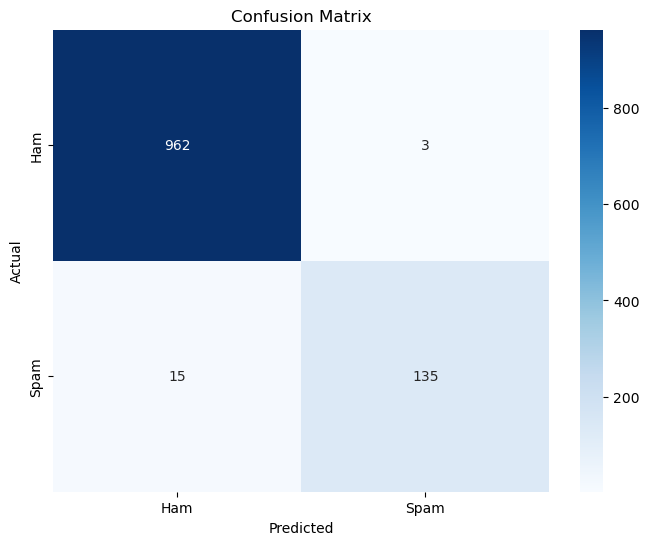

Precision: 0.9783
Recall: 0.9000


In [32]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Lightgbm

In [33]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(verbosity=-1)
lgbm.fit(x_train,y_train)
y_pred=lgbm.predict(x_test)
accuracy_score(y_test,y_pred)

0.97847533632287

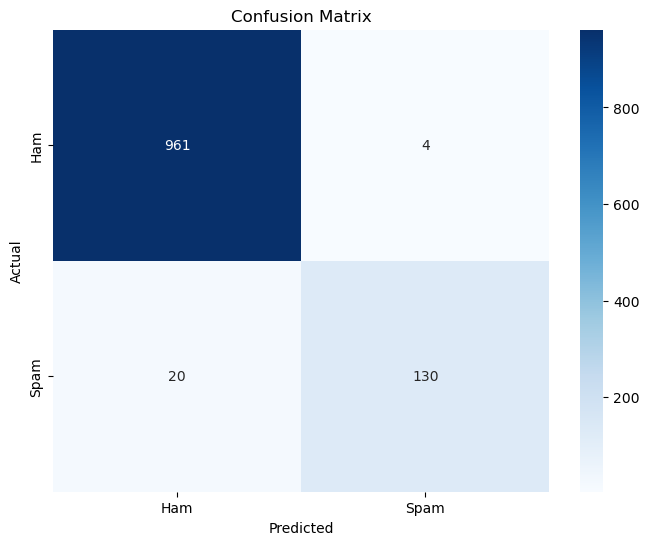

Precision: 0.9701
Recall: 0.8667


In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

XGBoost

In [35]:
xgb = XGBClassifier(verbosity=0)  

# Fit the model
xgb.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9757847533632287


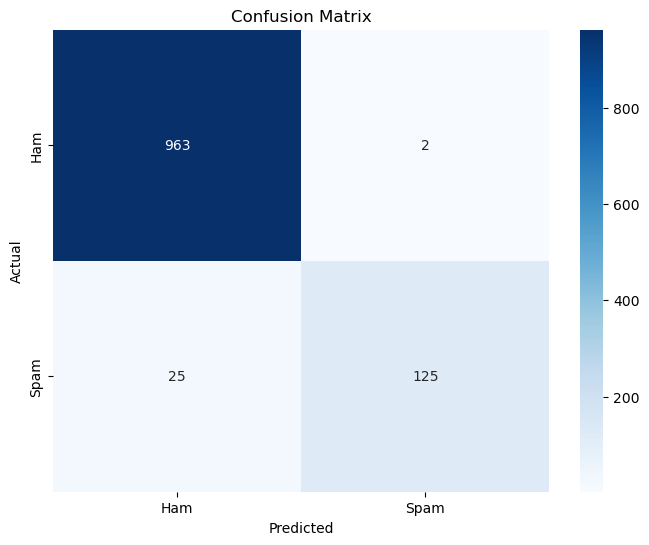

Precision: 0.9843
Recall: 0.8333


In [36]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Using TF-IDF and various ML Models

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
from sklearn.model_selection import train_test_split
x=df['v2']
y=df['v1']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
x_train

1978              im boat still mom check yo im half nake
3989    bank granit issu strongbuy explos pick member ...
3935                     r give second chanc rahul dengra
4078                          play smash bros ltgt religi
4086    privat account statement show unredeem point c...
                              ...                        
3772           came hostel go sleep plz call class hrishi
5191                                 sorri ill call later
5226                prabhaim sorydarealyfrm heart im sori
5390                                 nt joke serious told
860                                           work go min
Name: v2, Length: 4457, dtype: object

In [40]:
tfidf=TfidfVectorizer()
x_train=tfidf.fit_transform(x_train).toarray()
x_test=tfidf.transform(x_test).toarray()

In [41]:
naive_bayes=MultinomialNB().fit(x_train,y_train)

In [42]:
from sklearn.metrics import accuracy_score
y_pred=naive_bayes.predict(x_test)
accuracy_score(y_test,y_pred)

0.9659192825112107

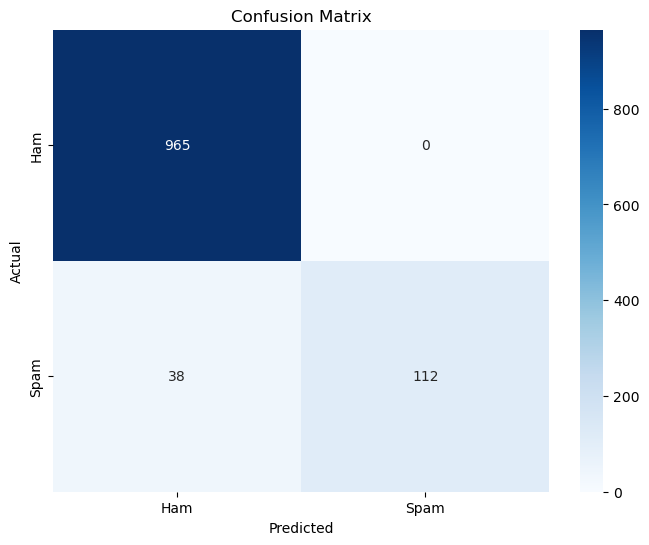

Precision: 1.0000
Recall: 0.7467


In [43]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

In [44]:
tfidf.vocabulary_

{'im': 2479,
 'boat': 573,
 'still': 4994,
 'mom': 3321,
 'check': 850,
 'yo': 6121,
 'half': 2194,
 'nake': 3432,
 'bank': 409,
 'granit': 2124,
 'issu': 2588,
 'strongbuy': 5030,
 'explos': 1684,
 'pick': 3916,
 'member': 3196,
 'nasdaq': 3442,
 'symbol': 5142,
 'cdgt': 803,
 'per': 3872,
 'give': 2043,
 'second': 4554,
 'chanc': 827,
 'rahul': 4216,
 'dengra': 1269,
 'play': 3949,
 'smash': 4778,
 'bros': 650,
 'ltgt': 3038,
 'religi': 4322,
 'privat': 4099,
 'account': 35,
 'statement': 4969,
 'show': 4677,
 'unredeem': 5593,
 'point': 3990,
 'call': 723,
 'identifi': 2462,
 'code': 965,
 'expir': 1679,
 'say': 4514,
 'never': 3490,
 'answer': 212,
 'text': 5248,
 'confirmdeni': 1031,
 'lost': 3003,
 'pound': 4032,
 'help': 2270,
 'okey': 3670,
 'dokey': 1398,
 'bit': 531,
 'sort': 4857,
 'stuff': 5043,
 'come': 982,
 'peopl': 3871,
 'wah': 5746,
 'lucki': 3044,
 'man': 3106,
 'save': 4512,
 'money': 3326,
 'hee': 2257,
 'much': 3392,
 'better': 502,
 'thank': 5263,
 'lol': 2979,
 

In [47]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(verbosity=-1)
lgbm.fit(x_train,y_train)
y_pred=lgbm.predict(x_test)
accuracy_score(y_test,y_pred)

0.967713004484305

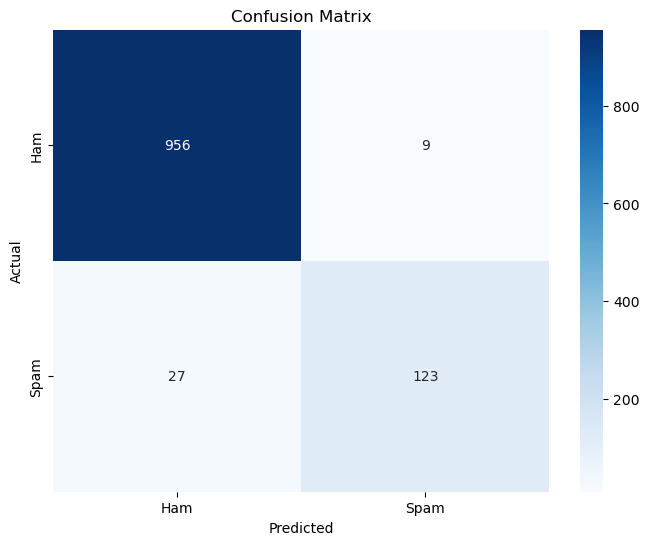

Precision: 0.9318
Recall: 0.8200


In [48]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

In [49]:
xgb = XGBClassifier(verbosity=0)  # You can set this to 0, 1, 2, or 3 based on your preference

# Fit the model
xgb.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9748878923766816


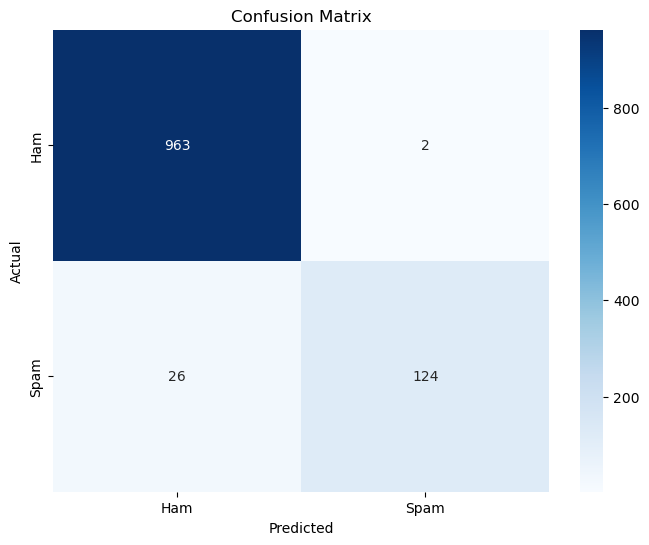

Precision: 0.9841
Recall: 0.8267


In [90]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Using TF-IDF and n gram

In [91]:
from sklearn.model_selection import train_test_split
x=df['v2']
y=df['v1']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
x_train

1978              im boat still mom check yo im half nake
3989    bank granit issu strongbuy explos pick member ...
3935                     r give second chanc rahul dengra
4078                          play smash bros ltgt religi
4086    privat account statement show unredeem point c...
                              ...                        
3772           came hostel go sleep plz call class hrishi
5191                                 sorri ill call later
5226                prabhaim sorydarealyfrm heart im sori
5390                                 nt joke serious told
860                                           work go min
Name: v2, Length: 4457, dtype: object

In [93]:
tfidf=TfidfVectorizer(ngram_range=(1,2))
x_train=tfidf.fit_transform(x_train).toarray()
x_test=tfidf.transform(x_test).toarray()

In [94]:
naive_bayes=MultinomialNB().fit(x_train,y_train)

In [95]:
from sklearn.metrics import accuracy_score
y_pred=naive_bayes.predict(x_test)
accuracy_score(y_test,y_pred)

0.957847533632287

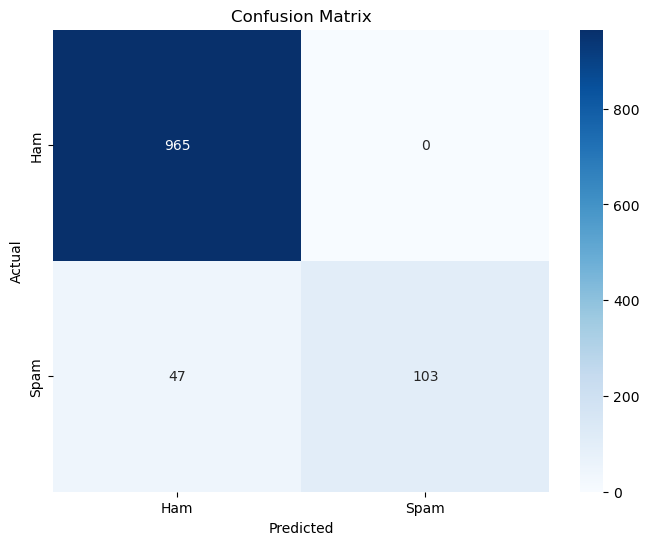

Precision: 1.0000
Recall: 0.6867


In [96]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

In [97]:
cv.vocabulary_

{'im': 12311,
 'boat': 2522,
 'still': 24605,
 'mom': 16725,
 'check': 3929,
 'yo': 30737,
 'half': 10773,
 'nake': 17411,
 'im boat': 12334,
 'boat still': 2524,
 'still mom': 24662,
 'mom check': 16728,
 'check yo': 3966,
 'yo im': 30751,
 'im half': 12387,
 'half nake': 10782,
 'bank': 1897,
 'granit': 10421,
 'issu': 12845,
 'strongbuy': 24864,
 'explos': 7775,
 'pick': 19737,
 'member': 16148,
 'nasdaq': 17462,
 'symbol': 25281,
 'cdgt': 3724,
 'per': 19511,
 'bank granit': 1905,
 'granit issu': 10422,
 'issu strongbuy': 12849,
 'strongbuy explos': 24865,
 'explos pick': 7776,
 'pick member': 19760,
 'member nasdaq': 16150,
 'nasdaq symbol': 17463,
 'symbol cdgt': 25282,
 'cdgt per': 3725,
 'give': 9647,
 'second': 22532,
 'chanc': 3793,
 'rahul': 21012,
 'dengra': 5973,
 'give second': 9698,
 'second chanc': 22535,
 'chanc rahul': 3800,
 'rahul dengra': 21013,
 'play': 19942,
 'smash': 23699,
 'bros': 2856,
 'ltgt': 15235,
 'religi': 21466,
 'play smash': 19969,
 'smash bros': 23

In [98]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(verbosity=-1)
lgbm.fit(x_train,y_train)
y_pred=lgbm.predict(x_test)
accuracy_score(y_test,y_pred)

0.9641255605381166

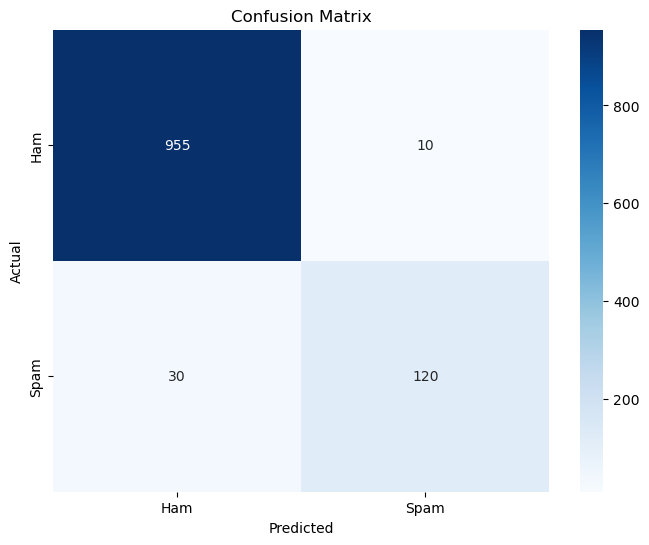

Precision: 0.9231
Recall: 0.8000


In [99]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

In [100]:
xgb = XGBClassifier(verbosity=0)  # You can set this to 0, 1, 2, or 3 based on your preference

# Fit the model
xgb.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9668161434977578


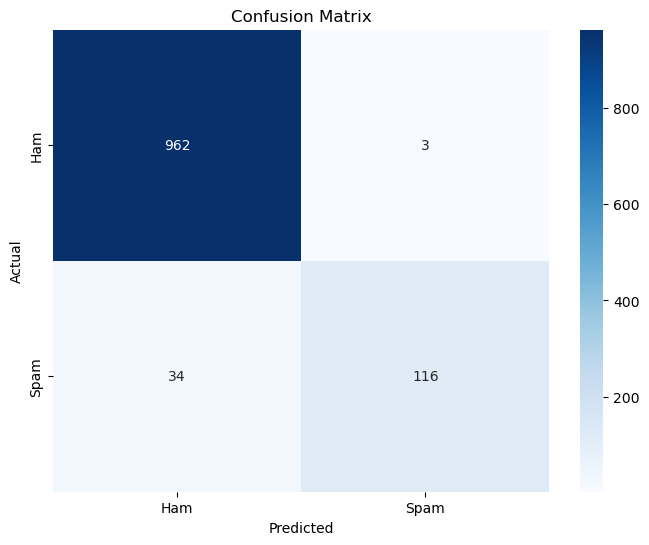

Precision: 0.9748
Recall: 0.7733


In [101]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Pickling the Naive Bayes

In [82]:
import pickle
model_filename = 'tfidf_naive_bayes_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump({'vectorizer': tfidf, 'model': naive_bayes}, file)


In [58]:
import pickle
with open('naive_bayes_model.pkl', 'wb') as model_file:
    pickle.dump(naive_bayes, model_file)
    
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(cv, vectorizer_file)